In [1]:
%matplotlib inline


# Calculate and Classify Normalized Difference Results with EarthPy

Learn how to calculate and classify normalized difference indices in Python using EarthPy.
This example shows how to calculate and classify the normalized difference vegetation
index (NDVI) using Landsat 8 data.


## Calculating Normalized Difference in Python Using EarthPy

<div class="alert alert-info"><h4>Note</h4><p>The examples below will show you how to use the ``normalized_diff()`` function
   to calculate the normalized difference vegetation index (NDVI), a commonly
   used remotely sensed index for quantifying vegetation health.</p></div>

The example below walks you through a typical workflow for calculating the normalized
difference vegetation index (NDVI) using Landsat 8 data with EarthPy. NDVI provides
a measure of healthy vegetation and ranges in value from -1 to 1. Values closer to
1 represent healthy, green vegetation. NDVI can be calculated from Landsat 8 data
using band 4 (red) and band 5 (near-infrared).

First, you will create a stack of bands using Landsat 8 data and then calculate
NDVI using the ``normalized_diff()`` function. Then, you will plot the NDVI results
using a colorbar legend with continuous values. Last, you will classify the NDVI
results using threshold values and plot the classified data with a categorical legend.



## Import Packages

To begin, import the needed packages. You will use a combination of several EarthPy
modules including spatial and plot.



In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio
import rasterio.plot as rp

## Import Example Data

To get started, make sure your directory is set. Then, create a stack from all of
the Landsat .tif files (one per band). The nodata value for Landsat 8 is
``-9999`` so you can use the ``nodata=`` parameter when you call the
``stack()`` function.



{'TIFFTAG_IMAGEDESCRIPTION': 'OrthoVistaProcessing ImageWriter', 'TIFFTAG_RESOLUTIONUNIT': '1 (unitless)', 'TIFFTAG_SOFTWARE': 'Trimble Germany GmbH', 'TIFFTAG_XRESOLUTION': '1', 'TIFFTAG_YRESOLUTION': '1'}


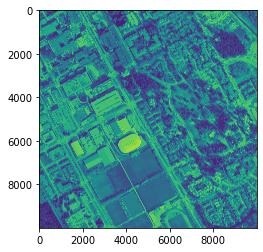

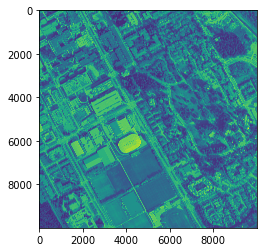

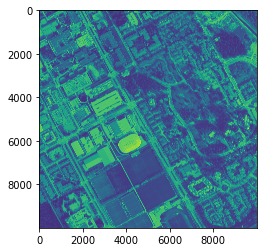

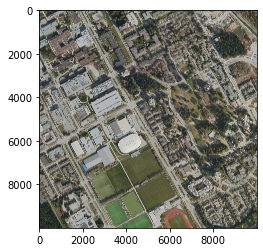

numpy.ndarray

In [2]:
os.chdir(os.path.join(et.io.HOME, "ubc/capstone/orthophoto/2020"))
dataset = rasterio.open('482E_5456N.tif')
print(dataset.tags())
rp.show(dataset.read([1]))
rp.show(dataset.read([2]))
rp.show(dataset.read([3]))
rp.show(dataset.read([1,2,3]))
data = dataset.read([1,2,3,4])
type(data)

## Calculate Normalized Difference Vegetation Index (NDVI)

You can calculate NDVI for your dataset using the
``normalized_diff`` function from the ``earthpy.spatial`` module.
Math will be calculated (b1-b2) / (b1 + b2).
## Plot NDVI With Colorbar Legend of Continuous Values

You can plot NDVI with a colorbar legend of continuous values using the plot_bands function from the earthpy.plot module.



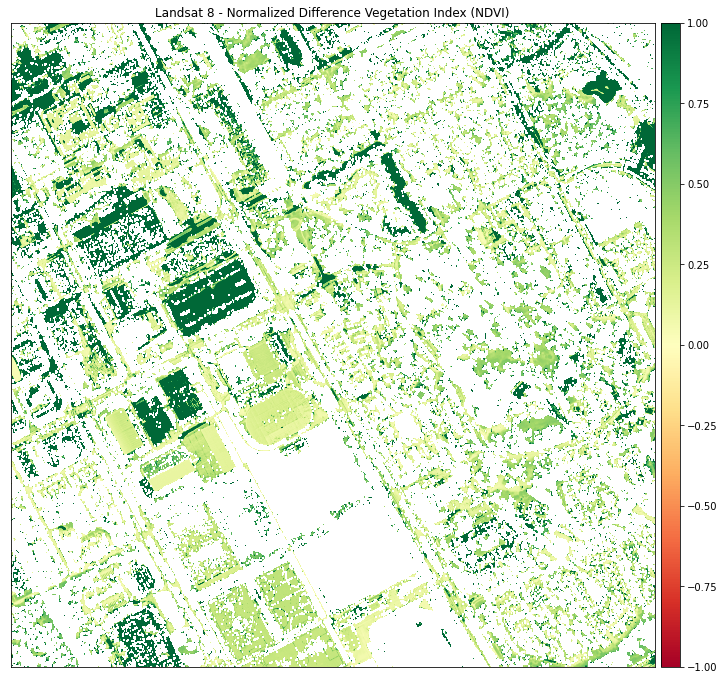

<AxesSubplot:title={'center':'Landsat 8 - Normalized Difference Vegetation Index (NDVI)'}>

In [8]:
# Landsat 8 red band is band 4 at [3]
# Landsat 8 near-infrared band is band 5 at [4]
ndvi = es.normalized_diff(data[3], data[2])
titles = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)



## Classify NDVI

Next, you can categorize (or classify) the NDVI results into useful classes.
Values under 0 will be classified together as no vegetation. Additional classes
will be created for bare area and low, moderate, and high vegetation areas.



In [9]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[2, 3, 4, 5, --],
             mask=[False, False, False, False,  True],
       fill_value=999999)

## Plot Classified NDVI With Categorical Legend - EarthPy Draw_Legend()

You can plot the classified NDVI with a categorical legend using the
``draw_legend()`` function from the ``earthpy.plot`` module.



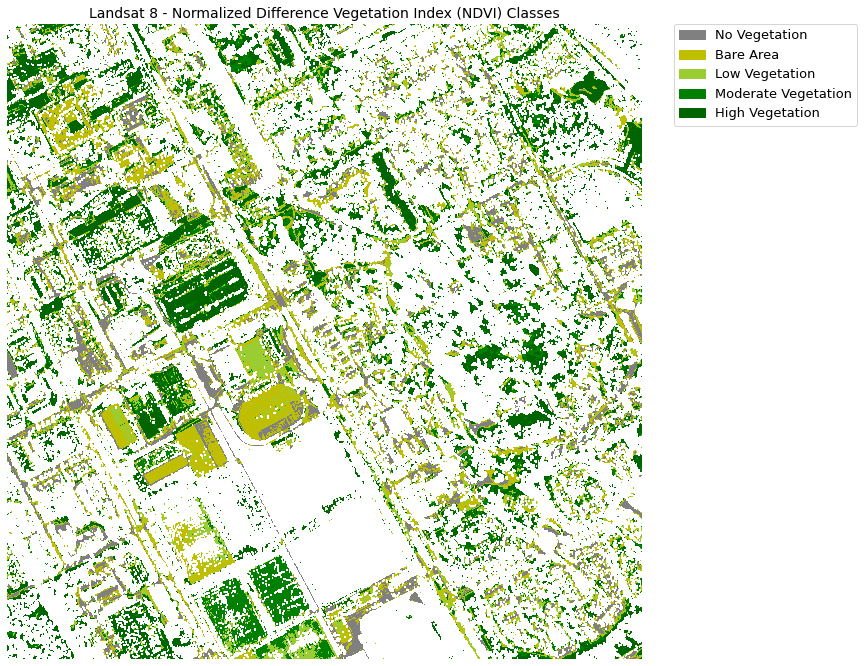

In [10]:
# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [6]:
pwd

'/home/jonathan/ubc/capstone/orthophoto/2020'